### Encoder y Decoder

¿Cual de estas secuencias es mas fácil de aprender?

- c1 = [1,34,5,56,32,678,345,32,645,43]
- c2 = [58,56,54,52,50,48,46,...,10,8,6,4,2,0]

Por longitud, seria la primera, sin embargo, si podemos obtener el patrón que describe la segunda, entonces solo tendríamos que aprender la formula; el resto seria un proceso generativo. Esto es exactamente lo que tratan de hacer los AE.

**Encoder:**
- Evalúa la cadena c2 y obtiene el módelo latente (la formula y sus parámetros)

**Decoder:**
- Genera la lista a partir del modelo latente.

Ahora, hay una distinción respecto al ejemplo anterior cuando trabajamos con AE, y es que vamos a usar redes neuronales para generar el modelo latente. Como uds ya saben, los modelo generados con NN están sujetos a error y a cierta aleatoriedad, por tanto el Decoder no va a generar exactamente lo mismo que viene de entrada, sino una reconstrucción aproximada, de lo que nos vamos a aprovechar para utilizarlo para generar “cosas distintas” pero similares.

### Mi Primer Autoencoder Neuronal

Vamos a crear un AE que comprime un dataset 3D en 2D y luego lo vuelve a reestablecer en 3D. Este autoencoder hace algo similar a PCA, que podemos hacer reduccion de dimensionalidad con redes neuronales!

#### Modelo AE

In [3]:
from tensorflow import keras

# codificador, de 3D a 2D
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])

# decodificador de 2D a 3D
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

# AE: pegamos las 2 redes neuronales de forma secuancial
AE = keras.models.Sequential([encoder, decoder])

# compilar el modelo
AE.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.01))

#### Generacion de Nuevo Dataset 3D

           x         y          z
0  -0.023893  0.880557   6.264838
1   0.063980  1.005169   6.246781
2   0.795656  0.482067  13.637674
3   1.134368  0.259582   1.368665
4   0.886839  0.464016  13.697916
..       ...       ...        ...
95  0.693797  0.900051   6.981679
96  0.944588 -0.219927   1.708483
97 -0.101017 -0.800565   9.349302
98  0.114387 -0.912378   9.394417
99  0.453359  0.860545   0.414228

[100 rows x 3 columns]


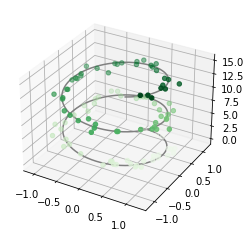

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

fig = plt.figure()
ax = plt.axes(projection='3d')

# generar la linea
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# generar datos del scatter
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# creamos un df de pandas
df = pd.DataFrame({'x':xdata, 'y':ydata, 'z':zdata})
print(df)

In [5]:
hist = AE.fit(df.values,df.values, epochs=20)
gen = AE.predict(df.values)

Epoch 1/20
4/4 [==============================] - 0s 1ms/step - loss: 4.9312
Epoch 2/20
4/4 [==============================] - 0s 876us/step - loss: 0.7669
Epoch 3/20
4/4 [==============================] - 0s 999us/step - loss: 0.6766
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7136
Epoch 5/20
4/4 [==============================] - 0s 936us/step - loss: 0.6448
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6298
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6733
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6598
Epoch 9/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6005
Epoch 10/20
4/4 [==============================] - 0s 988us/step - loss: 0.5984
Epoch 11/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5880
Epoch 12/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5781
Epoch 13/20
4/4 [==============================] - 0s 1ms/step - 

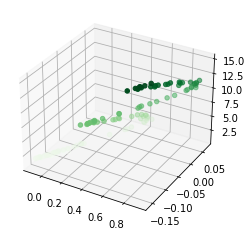

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# generar datos del scatter
zdata = gen[:,2]
xdata = gen[:,0]
ydata = gen[:,1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');